In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('top_gun_data_1.db')


    # Create a cursor object to execute queries
cursor = conn.cursor()

# Example query: Select all data from 'degradations' table
cursor.execute("""
WITH evolution_usure as (
SELECT 
    linked_aero,
    compo_concerned,
    measure_day,
    usure_ancienne,
    usure_nouvelle,
    (usure_nouvelle - usure_ancienne) AS evolution_usure
FROM (
    SELECT 
        linked_aero,
        compo_concerned,
        measure_day,
        LAG(usure_nouvelle, 1,0) OVER (PARTITION BY linked_aero, compo_concerned ORDER BY measure_day) AS usure_ancienne,
        usure_nouvelle
    FROM 
        degradations
) AS subquery
ORDER BY 
    linked_aero, 
    compo_concerned, 
    measure_day)
SELECT l."aero_linked",l."jour_vol",l."time_en_air",l."etat_voyant",
l."temp en °C",l."pressure en hPa",l."vibrations en m/s²",e."compo_concerned",
e."usure_ancienne",e."usure_nouvelle",e."evolution_usure",c."categorie",c."desc",
c."lifespan",c."cout"
FROM logs_vols as l
JOIN evolution_usure as e ON e.linked_aero = l.aero_linked
JOIN composants as c ON c.aero = l.aero_linked
""")

# Fetch all rows
rows = cursor.fetchall()
data = []

for row in rows:
    data.append(row)     # Or process the rows as needed

# Close the cursor and connection
cursor.close()
conn.close()


In [7]:
evolution_degradation = pd.DataFrame(data,columns=["aero","jour_vol","time_en_air","etat_voyant","temp en °C","pressure en hPa","vibrations en m/s²"
                                                   ,"compo_concerned","usure_ancienne","usure_nouvelle","evolution_usure","categorie","desc"
                                                   ,"lifespan","cout"])
evolution_degradation.head()

,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²,compo_concerned,usure_ancienne,usure_nouvelle,evolution_usure,categorie,desc,lifespan,cout
0,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Détecteurs de fumée,11066.0,2147.0
1,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Hublots,68978.0,3593.0
2,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Porte cargo,11447.0,2850.0
3,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Portes passagers,13107.0,3053.0
4,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116,AILB767-B767_4924-20,0.0,20.0,20.0,0,Siège copilote,14200.0,3722.0


Analyser les correlations entre les indices vols et les dégradations

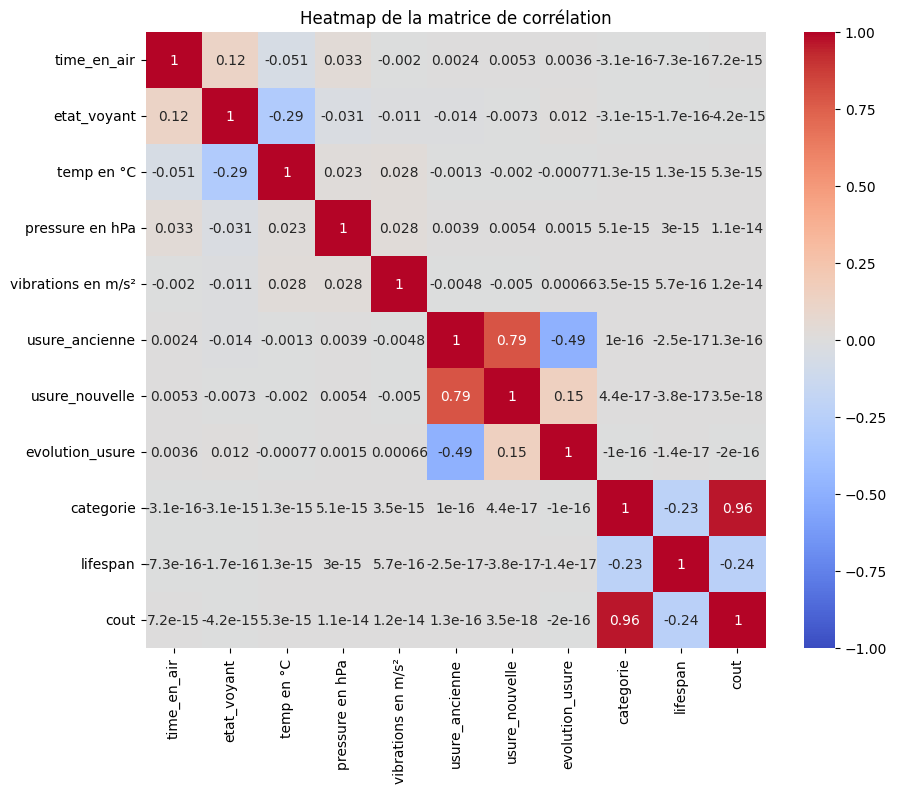

In [13]:
# Calculer la matrice de corrélation
corr_matrix = evolution_degradation.select_dtypes(include=['float64', 'int64']).corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de la matrice de corrélation')
plt.show()

time_en_air           0.124333
temp en °C           -0.293967
pressure en hPa      -0.030735
vibrations en m/s²   -0.011141
usure_nouvelle       -0.007287
evolution_usure       0.011692
dtype: float64


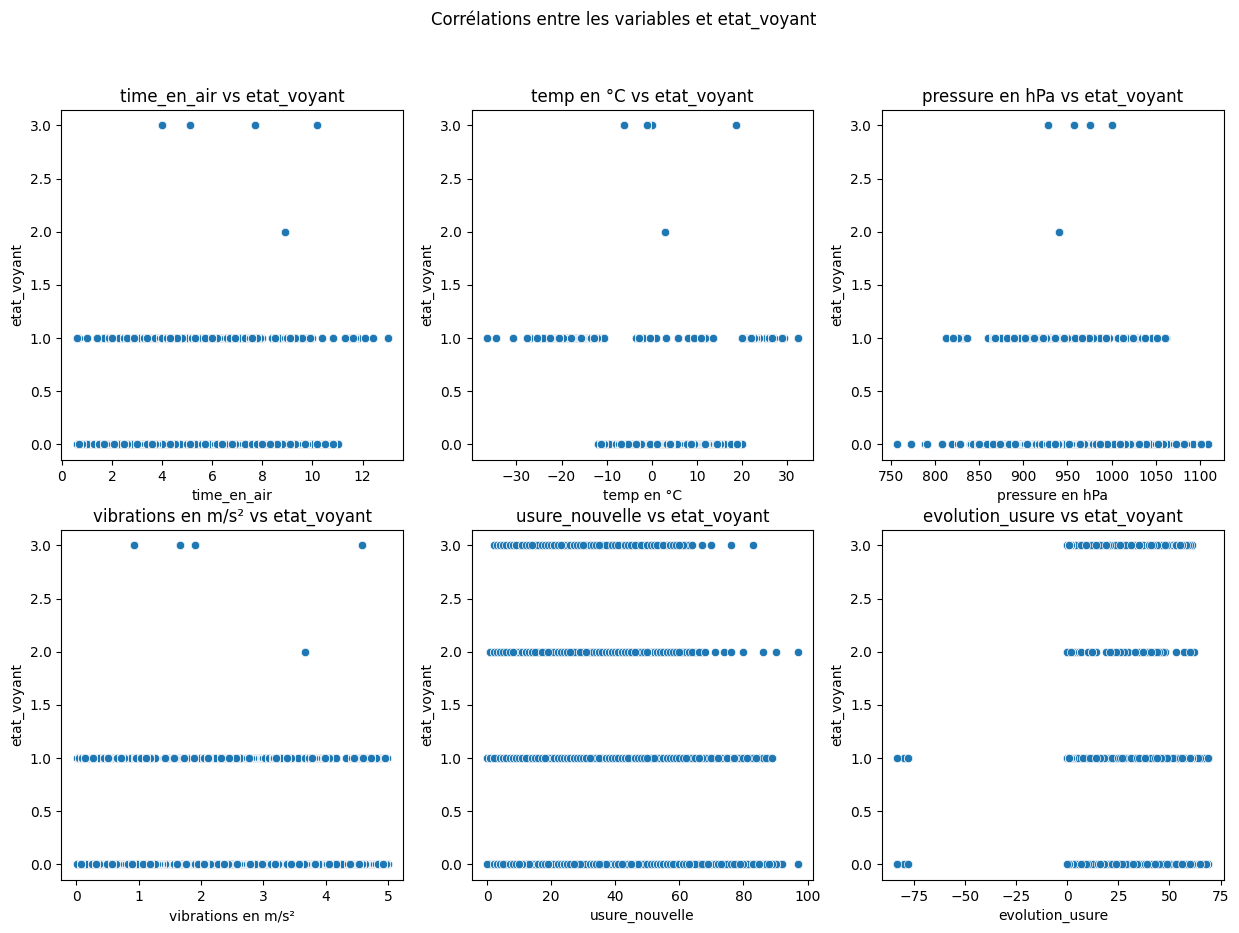

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Définir les variables 
X = evolution_degradation[["time_en_air","temp en °C","pressure en hPa","vibrations en m/s²","usure_nouvelle","evolution_usure"]]
y = evolution_degradation["etat_voyant"]

# Calcul des corrélations
correlations = X.corrwith(y)

# Afficher les coefficients de corrélation
print(correlations)

# Visualisation des scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Corrélations entre les variables et etat_voyant')

for i, col in enumerate(X.columns):
    row, col_pos = divmod(i, 3)
    sns.scatterplot(ax=axs[row, col_pos], x=X[col], y=y)
    axs[row, col_pos].set_title(f'{col} vs etat_voyant')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel('etat_voyant')


Coefficients de corrélation :
time_en_air           0.003633
temp en °C           -0.000769
pressure en hPa       0.001451
vibrations en m/s²    0.000662
usure_nouvelle        0.149028
etat_voyant           0.011692
dtype: float64


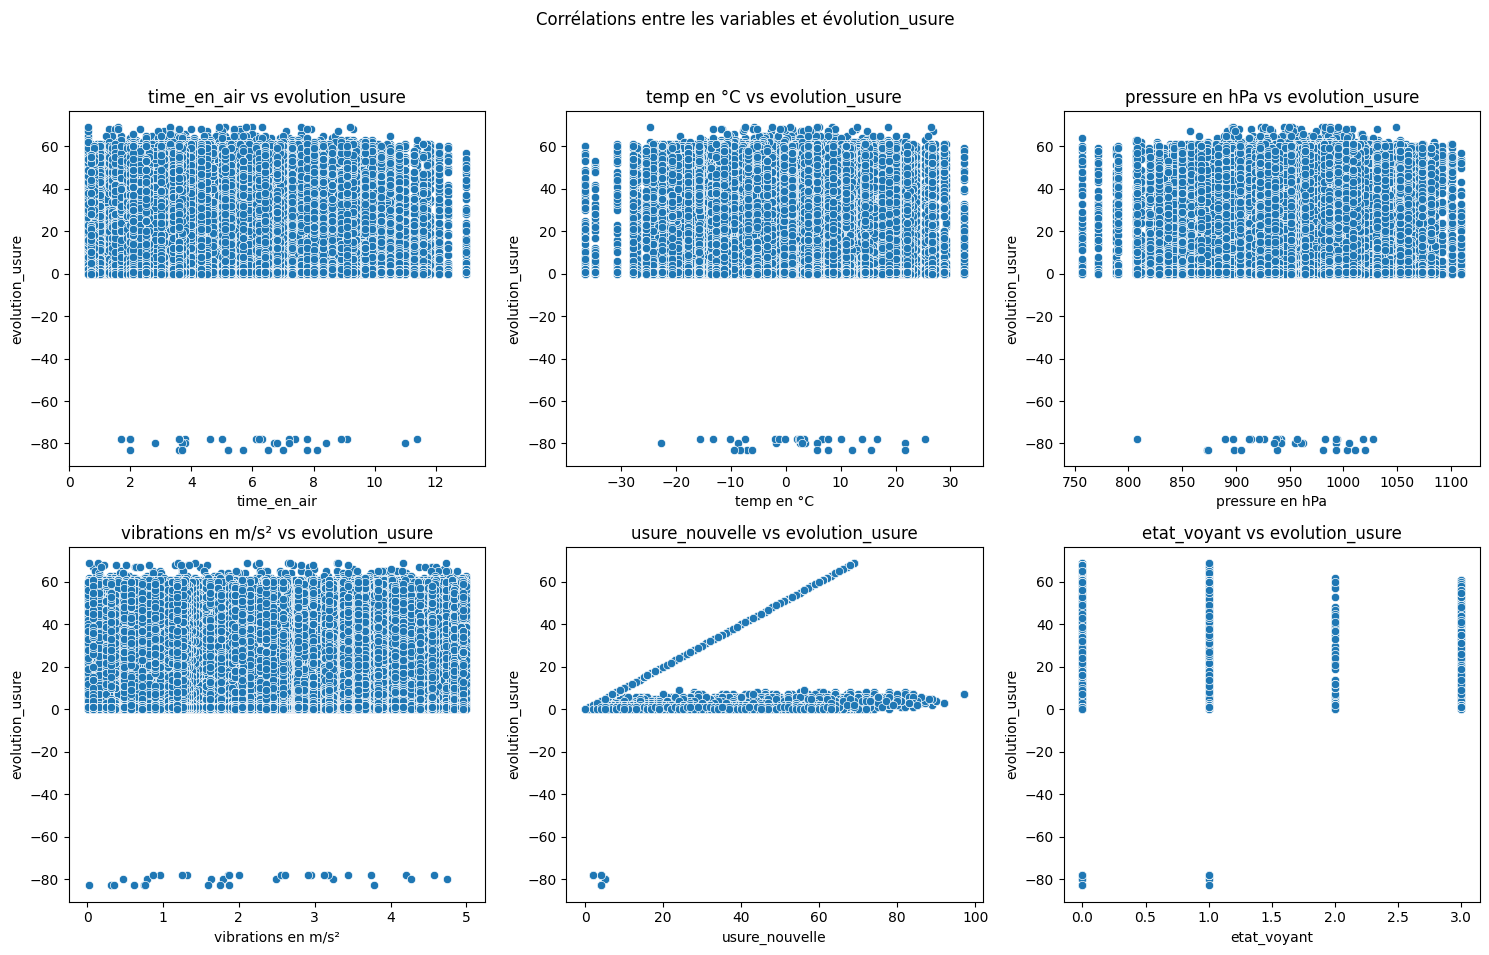

In [ ]:
# Définir les variables 
X = evolution_degradation[["time_en_air", "temp en °C", "pressure en hPa", "vibrations en m/s²", "usure_nouvelle","etat_voyant"]]
y = evolution_degradation["evolution_usure"]

# Calcul des corrélations
correlations = X.corrwith(y)

# Afficher les coefficients de corrélation
print("Coefficients de corrélation :")
print(correlations)

# Visualisation des scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Corrélations entre les variables et évolution_usure')

for i, col in enumerate(X.columns):
    row, col_pos = divmod(i, 3)  # Utilisation de divmod pour obtenir la ligne et la colonne correctes
    sns.scatterplot(ax=axs[row, col_pos], x=X[col], y=y)
    axs[row, col_pos].set_title(f'{col} vs evolution_usure')
    axs[row, col_pos].set_xlabel(col)
    axs[row, col_pos].set_ylabel('evolution_usure')

# Supprimer les axes vides s'il y en a
if len(X.columns) % 3 != 0:
    for j in range(len(X.columns), 6):
        fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()